# Task 4.10 - Part 2

## Table of Contents:

#### Continued from Previous Notebook

#### Library and Data Import

#### 8: Key Questions and Analysis
1. What are the busiest days of the week and hours of the day?
2. What are the times of the day when people spend more money?
3. What can we learn from simpler price range groupings?
4. Are certain types of products more popular than others?
5. Are there different types of customers and do their ordering behaviors differ?

* What is the distribution among users with regards to brand loyalty?
* Are there differences in order and spending habits based on a customer's loyalty status?
* Are there differences in order and spending habits based on customer region?
* Are there differences in order and spending habits based on age and family status?

6: Are there other considerations regarding customer behaviors or demographics?

## Library and Data Import

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path to folder
path = r'/Users/caitlin/Documents 2/Instacart Basket Analysis 12.2021'

In [3]:
path

'/Users/caitlin/Documents 2/Instacart Basket Analysis 12.2021'

In [4]:
# Import data file
master_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'master_df_2.pkl'))

In [5]:
# Show all columns
pd.options.display.max_columns = None

In [6]:
# Show all rows
pd.options.display.max_rows = None

In [7]:
# Check import
master_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,single_order,product_id,add_to_cart_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,order_avg,spender_type,median_days_prior_order,customer_frequency,customer_first_name,customer_surname,customer_gender,customer_state,customer_age,date_customer_joined,customer_number_dependents,customer_family_status,customer_income,_merge,customer_region,customer_activity,age_group,income_group,parental_status,department_name,order_day
0,2539329,1,1,2,8,NaN,True,196,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,regular activity customer,31-40,020000 - 050000,parent,beverages,Monday
1,2398795,1,2,3,7,15.0,False,196,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Moderate Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,regular activity customer,31-40,020000 - 050000,parent,beverages,Tuesday
2,473747,1,3,3,12,21.0,False,196,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,regular activity customer,31-40,020000 - 050000,parent,beverages,Tuesday
3,2254736,1,4,4,7,29.0,False,196,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Moderate Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,regular activity customer,31-40,020000 - 050000,parent,beverages,Wednedsday
4,431534,1,5,4,15,28.0,False,196,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,regular activity customer,31-40,020000 - 050000,parent,beverages,Wednedsday


### 8. Key Questions and Analysis

#### Question 1: What are the busiest days of the week and hours of the day?

Text(0, 0.5, 'Count of Orders on Day')

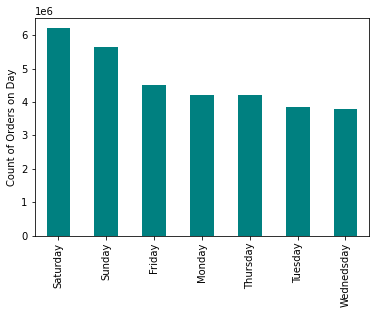

In [339]:
# Bar graph days of week 
order_day_bar = master_df['order_day'].value_counts().plot.bar(color = 'teal')
plt.ylabel("Count of Orders on Day")

In [340]:
# Export bar graph
order_day_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_day.png'))

To illustrate the busiest times of day, I will create a graph that also incorporates the busiest days variable to make it clearer and more visually appealing.

In [232]:
# Create crosstab of of busiest day by business variable
busy_day = pd.crosstab(master_df['order_day'], master_df['busiest_days'], dropna = False)

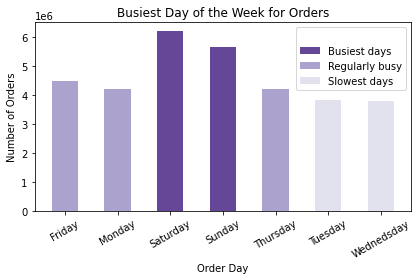

In [264]:
# Bar graph of busy times
busy_day_bar = busy_day.plot.bar(stacked = True, color = sns.color_palette('PuOr_r'))
plt.ylabel("Number of Orders")
plt.xlabel("Order Day")
plt.title("Busiest Day of the Week for Orders")
plt.legend(title=" ")
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()
plt.autoscale()

In [265]:
busy_day_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_day_final.png'))

Text(0, 0.5, 'Count of Order Time')

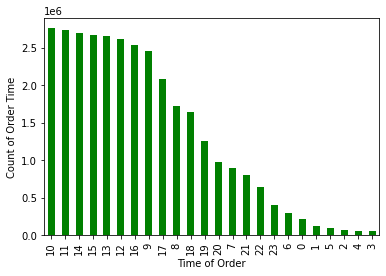

In [13]:
# Bar graph days of week 
order_time_bar = master_df['order_hour_of_day'].value_counts().plot.bar(color = 'green')
plt.xlabel("Time of Order")
plt.ylabel("Count of Order Time")

In [14]:
# Export days of week bar graph
order_time_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_time.png'))

As above, illustrate the busiest times of day, I will create a graph that also incorporates the busiest period variable to make it clearer and more visually appealing.

In [53]:
# Create crosstab of of busiest period of day and order time
busy_time = pd.crosstab(master_df['order_hour_of_day'], master_df['busiest_period_of_day'], dropna = False)

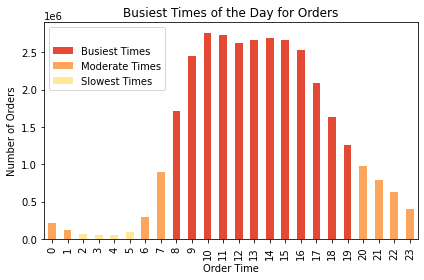

In [270]:
# Bar graph of busy times and busiest order crosstab
busy_time_bar = busy_time.plot.bar(stacked = True, color = sns.color_palette('RdYlGn'))
plt.ylabel("Number of Orders")
plt.xlabel("Order Time")
plt.title("Busiest Times of the Day for Orders")
plt.legend(title=" ",loc='upper left')
plt.tight_layout()

In [271]:
#Export busy times and busiest orders graph
busy_time_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_time_final.png'))

The busiest days of the week are Saturday and Sunday, and the busiest time of the day is 10:00 and 11:00 am. Ideal times for targeted advertising would be Tuesday and Wednesday, in the evenings after 8:00.

### Question 2: Are there times of day when people spend the most money?

To make a line graph, I will create a sample of the data.

In [8]:
# Sampling data - create list holding true/false values to test np.random 
np.random.seed(4)
dev = np.random.rand(len(master_df)) <= 0.7

In [9]:
# Examine dev list
dev

array([False,  True, False, ...,  True, False,  True])

Note: It appears as it should because it shows the values are less than or equal to 0.7, which is the desired value. 

Split dataframe into two samples:

In [10]:
# Store 70% of the sample in dataframe named "big"
big = master_df[dev]

In [11]:
# Store 30% of the sample in dataframe named "small"
small = master_df[~dev]

In [12]:
# Check sample subsets
len(master_df)

32399727

In [13]:
len(big) + len(small)

32399727

The numbers from both lines of code match, which shows the sample sizes are accurate.

In [14]:
# Create line graph of prices and time - using sample
master_df_2 = small[['order_hour_of_day','prices']]

Text(0.5, 1.0, 'Spending by Time of Day')

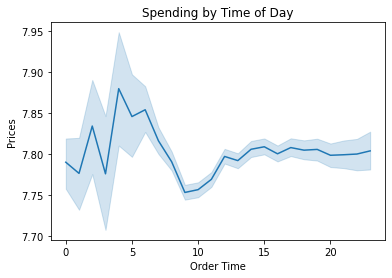

In [15]:
line = sns.lineplot(data = master_df_2, x = 'order_hour_of_day', y = 'prices')
plt.xlabel("Order Time")
plt.ylabel("Prices")
plt.title("Spending by Time of Day")

In [16]:
# Export line graph
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'time_spending.png'))

In [28]:
# Create crosstab of spender type and product types
products_times = pd.crosstab(master_df['order_hour_of_day'], master_df['price_range_loc'], dropna = False)

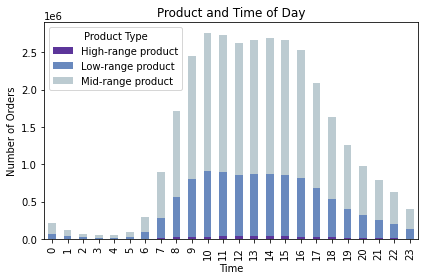

In [36]:
# Bar graph of spender type and products
products_times_bar = products_times.plot.bar(stacked = True, color = sns.color_palette('twilight_shifted'))
plt.ylabel("Number of Orders")
plt.xlabel("Time")
plt.title("Product and Time of Day")
plt.legend(title="Product Type",loc='upper left')
plt.xticks(horizontalalignment="center")
plt.tight_layout()

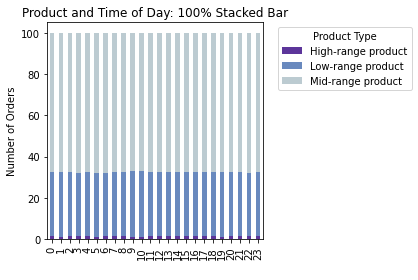

In [43]:
products_times_bar_100_bar = products_times.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('twilight_shifted'))
plt.ylabel("Number of Orders")
plt.xlabel(" ")
plt.title("Product and Time of Day: 100% Stacked Bar")
plt.legend(title="Product Type",bbox_to_anchor=(1.05,1))
plt.xticks(horizontalalignment="center")
plt.tight_layout()

In [45]:
# Export bar graph
products_times_bar_100_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'product_time_100_bar.png'))

People spend the most money earlier in the day - around 5:00 am. 

### Question 3: What can we learn from simpler price range groupings?

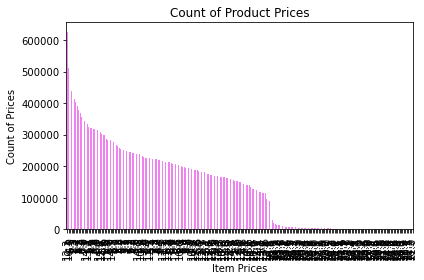

In [272]:
# Graph prices alone
prices_bar = master_df['prices'].value_counts().plot.bar(color = 'violet')
plt.xlabel("Item Prices")
plt.ylabel("Count of Prices")
plt.title("Count of Product Prices")
plt.tight_layout()

In [273]:
#Export product type graph
prices_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_bar.png'))

The above is a graph of all prices, of all items. Below is a graph of products by price grouping.

Text(0, 0.5, '')

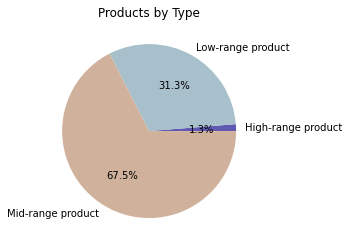

In [47]:
# Create pie chart of products by range
pie_prices_group = master_df['price_range_loc'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('twilight_shifted', 4))
plt.title("Products by Type")
plt.ylabel('')

In [274]:
# Export pie chart
pie_prices_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'product_type_pie.png'))

In [17]:
# Check range of prices
master_df['prices'].agg({'mean', 'min', 'max'})

min      1.000000
mean     7.790994
max     25.000000
Name: prices, dtype: float64

Grouping products by type (low, mid, and high range products) makes analysis much easier. Mid-range products make up a vast majority of the items for sale on Instacart.

In [47]:
# Create crosstab of spender type and product types
spenders_products = pd.crosstab(master_df['price_range_loc'], master_df['spender_type'], dropna = False)

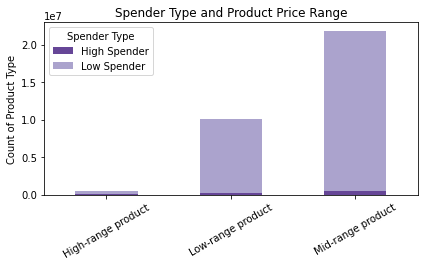

In [49]:
# Bar graph of spender type and products
spenders_products_bar = spenders_products.plot.bar(stacked = True, color = sns.color_palette('PuOr_r'))
plt.ylabel("Count of Product Type")
plt.xlabel(" ")
plt.title("Spender Type and Product Price Range")
plt.legend(title="Spender Type",loc='upper left')
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

In [50]:
# Export spender type and product range graph
spenders_products_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spenders_products_final.png'))

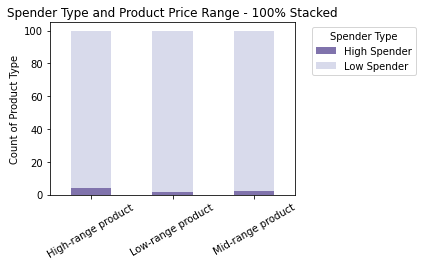

In [52]:
# 100% stacked bar to see difference between spender types
spenders_products_100_bar = spenders_products.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('PuOr_r', 4))
plt.ylabel("Count of Product Type")
plt.xlabel(" ")
plt.title("Spender Type and Product Price Range - 100% Stacked")
plt.legend(title="Spender Type",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

In [53]:
# Export spender type and product range graph
spenders_products_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spenders_products_100_final.png'))

In [61]:
# Create sub-group of only high priced products
high_price_sub = master_df[master_df['price_range_loc']=="High-range product"]

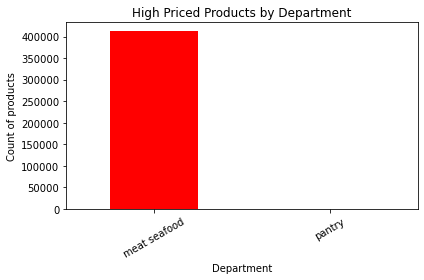

In [78]:
# Graph high priced prodcuts by department
high_price_dept_bar = high_price_sub['department_name'].value_counts(dropna = False).plot.bar(color = 'red')
plt.title("High Priced Products by Department")
plt.xlabel("Department")
plt.ylabel("Count of products")
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

In [79]:
# Export high priced products in departments
high_price_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'high_priced_dept.png'))

Grouping products into price ranges allows for analysis of products by price range that is lost with the granularity of the prices alone. It also allows for a wider range of visualizations. Analysis suggeests that high spenders spend more money on their products - they do not order more.

### Question 4: Are certain types of products more popular than others?

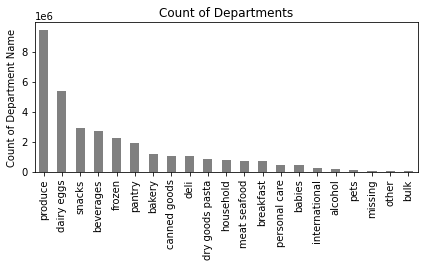

In [284]:
# Bar graph of department name value counts
dept_name_bar = master_df['department_name'].value_counts().plot.bar(color = "grey")
plt.ylabel("Count of Department Name")
plt.xlabel(" ")
plt.title("Count of Departments")
plt.tight_layout()

In [285]:
# Export spender type and product range graph
dept_name_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_count_bar.png'))

The highest performing departments, by count alone, appear to be: 1. produce, 2. dairy/eggs, 3. beverages, 4. frozen, 5. pantry.

In [88]:
# Check to see which departments have the highest sales
dept_sales = master_df.groupby('department_name').agg({'prices': ['sum']})

In [89]:
dept_sales

,prices
,sum
department_name,
alcohol,1251654.3
babies,3237160.6
bakery,9208026.0
beverages,20646135.1
breakfast,5644626.0
bulk,288648.6
canned goods,8053132.0
dairy eggs,44956110.5


In [91]:
dept_sales.to_clipboard()

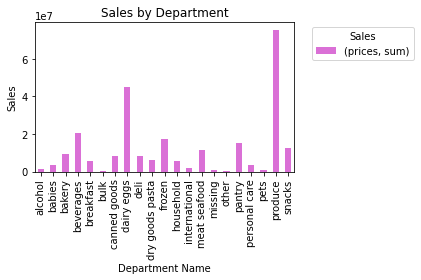

In [294]:
#Bar graph of sales by department
dept_sales_bar = dept_sales.plot.bar(color = 'orchid')
plt.ylabel("Sales")
plt.xlabel("Department Name")
plt.title("Sales by Department")
plt.legend(title="Sales",bbox_to_anchor=(1.05,1))
plt.tight_layout()

In [295]:
# Export sales by department graph
dept_sales_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_depts_sales.png'))

When also looking at sales, the highest performing departments remain the same.

In [81]:
# Create new tag for top performing departments
master_df.loc[master_df['department_id'].isin([4,16,7,13,1]), 'department_type'] = "Top Department"
master_df.loc[master_df['department_id'].isin([2,3,5,6,8,9,10,11,12,14,15,16,17,18,19,20,21]), 'department_type'] = "Regular Department"

In [82]:
# Check department variable value counts
master_df['department_type'].value_counts(dropna = False).sort_index()

Regular Department    16122204
Top Department        16277523
Name: department_type, dtype: int64

In [83]:
# Check creation of new columns
master_df[['department_id','department_type']].head(100)

,department_id,department_type
0,7,Top Department
1,7,Top Department
2,7,Top Department
3,7,Top Department
4,7,Top Department
5,7,Top Department
6,7,Top Department
7,7,Top Department
8,7,Top Department
9,7,Top Department


In [84]:
master_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,single_order,product_id,add_to_cart_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,order_avg,spender_type,median_days_prior_order,customer_frequency,customer_first_name,customer_surname,customer_gender,customer_state,customer_age,date_customer_joined,customer_number_dependents,customer_family_status,customer_income,_merge,customer_region,customer_activity,age_group,income_group,parental_status,department_name,order_day,department_type
0,2539329,1,1,2,8,NaN,True,196,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,regular activity customer,31-40,020000 - 050000,parent,beverages,Monday,Top Department
1,2398795,1,2,3,7,15.0,False,196,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Moderate Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,regular activity customer,31-40,020000 - 050000,parent,beverages,Tuesday,Top Department
2,473747,1,3,3,12,21.0,False,196,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,regular activity customer,31-40,020000 - 050000,parent,beverages,Tuesday,Top Department
3,2254736,1,4,4,7,29.0,False,196,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Moderate Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,regular activity customer,31-40,020000 - 050000,parent,beverages,Wednedsday,Top Department
4,431534,1,5,4,15,28.0,False,196,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,regular activity customer,31-40,020000 - 050000,parent,beverages,Wednedsday,Top Department


Text(0, 0.5, '')

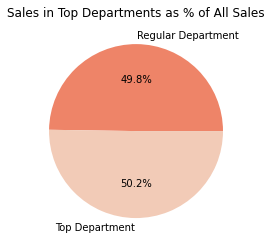

In [85]:
# Create pie chart top performing departments
pie_dept_type = master_df['department_type'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('coolwarm_r', 4))
plt.title("Sales in Top Departments as % of All Sales")
plt.ylabel('')

In [86]:
# Export pie chart
pie_dept_type.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top_dept_pie.png'))

As the pie chart indicates, the five top performing departments account for over 50% of all orders. 

### Question 5: are there different types of customers and do their ordering behaviors differ?

* #### 5a. What is the distribution among users with regards to brand loyalty?

Text(0, 0.5, '')

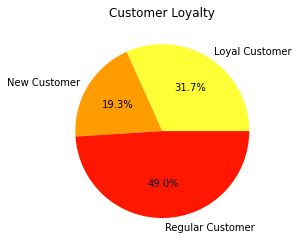

In [162]:
# Create pie chart of customer loyalty groups
pie_cust_loyal = master_df['loyalty_flag'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('hot_r', 4))
plt.title("Customer Loyalty")
plt.ylabel('')

In [163]:
# Export pie chart
pie_cust_loyal.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cust_loyal_pie.png'))

* #### 5b. Are there differences in ordering habits based on a customer's loyalty status?

In [98]:
# Create crosstab of customer loyalty and price of order
loyal_price = pd.crosstab(master_df['loyalty_flag'], master_df['price_range_loc'], dropna = False)

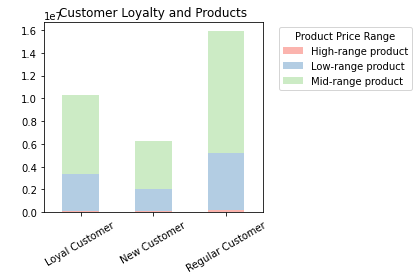

In [300]:
# Bar graph of loyalty spending habits
loyal_price_bar = loyal_price.plot.bar(stacked = True, color = sns.color_palette('Pastel1'))
plt.ylabel(" ")
plt.xlabel("")
plt.title("Customer Loyalty and Products")
plt.legend(title="Product Price Range",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

In [301]:
# Export bar graph
loyal_price_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_products.png'))

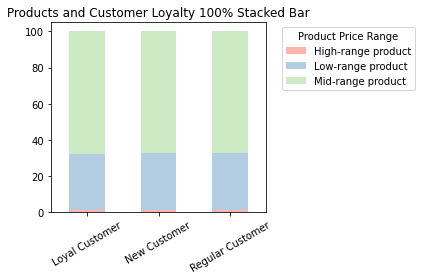

In [101]:
# Stacked 100% Bar for Spend Type
loyal_price_100_bar = loyal_price.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Pastel1', 4))
plt.ylabel(" ")
plt.xlabel("")
plt.title("Products and Customer Loyalty 100% Stacked Bar")
plt.legend(title="Product Price Range",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

In [102]:
# Export bar graph
loyal_price_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_products_100.png'))

In [173]:
# Create crosstab of customer loyalty and price of order
loyal_spender = pd.crosstab(master_df['loyalty_flag'], master_df['spender_type'], dropna = False)

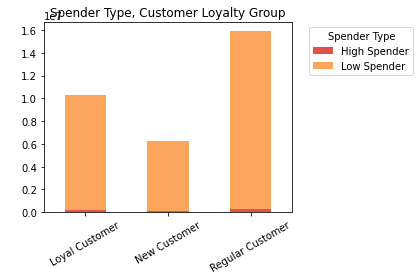

In [306]:
# Bar graph of loyalty and spending type
loyal_spender_bar = loyal_spender.plot.bar(stacked = True, color = sns.color_palette('Spectral'))
plt.ylabel(" ")
plt.xlabel("")
plt.title("Spender Type, Customer Loyalty Group")
plt.legend(title="Spender Type",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

In [307]:
# Export bar graph
loyal_spender_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_spender_bar.png'))

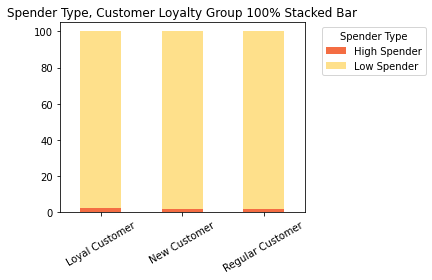

In [308]:
# Stacked 100% Bar for Spend Type
loyal_spender_100_bar = loyal_spender.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Spectral', 4))
plt.ylabel(" ")
plt.xlabel("")
plt.title("Spender Type, Customer Loyalty Group 100% Stacked Bar")
plt.legend(title="Spender Type",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

In [309]:
# Export bar graph
loyal_spender_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_spender_100_bar.png'))

In [93]:
# Determine difference of spending habits between loyalty groups
loyalty_spending = master_df.groupby('loyalty_flag').agg({'prices': ['sum']})

In [94]:
loyalty_spending

,prices
,sum
loyalty_flag,
Loyal Customer,79933825.2
New Customer,48701652.1
Regular Customer,123790606.2


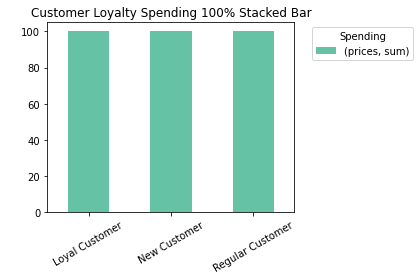

In [103]:
# Stacked 100% Bar for Spend Type
loyal_spending_100_bar = loyalty_spending.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Spectral_r', 4))
plt.ylabel(" ")
plt.xlabel("")
plt.title("Customer Loyalty Spending 100% Stacked Bar")
plt.legend(title="Spending",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

In [104]:
# Export bar graph
loyal_spending_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_spending_100_bar.png'))

In [197]:
loyalty_spending.to_clipboard()

Based on the sum of orders, loyal customers do not spend more per order than regular and new customers. They only thing that separates them from the other customers is that they order more frequently.

* #### 5c. Are there differences in ordering and spending habits based on customer region?

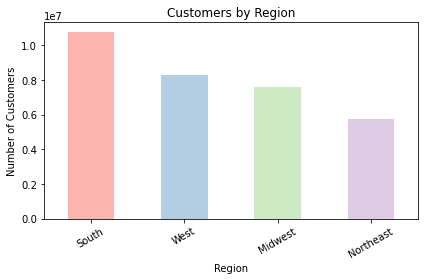

In [310]:
# Bar graph of customer region
cust_region_bar = master_df['customer_region'].value_counts().plot.bar(color = sns.color_palette('Pastel1'))
plt.ylabel("Number of Customers")
plt.xlabel("Region")
plt.title("Customers by Region")
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

In [311]:
# Export customer region bar graph
cust_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cust_region_bar.png'))

Text(0, 0.5, '')

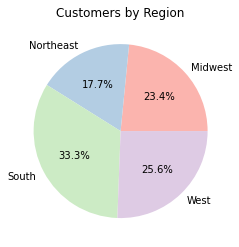

In [83]:
# Create pie chart of customer regions
pie_cust_region = master_df['customer_region'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('Pastel1', 4))
plt.title("Customers by Region")
plt.ylabel('')

In [84]:
# Export customer region pie graph
pie_cust_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cust_region_pie.png'))

In [91]:
# Create crosstab of region and spender type
region_spend_type = pd.crosstab(master_df['customer_region'], master_df['spender_type'], dropna = False)

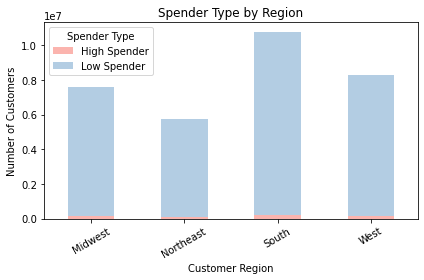

In [315]:
# Bar graph of spender type by region
region_spend_type_bar = region_spend_type.plot.bar(stacked = True, color = sns.color_palette('Pastel1'))
plt.ylabel("Number of Customers")
plt.xlabel("Customer Region")
plt.title("Spender Type by Region")
plt.legend(title="Spender Type",loc='upper left')
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

In [316]:
# Export customer region pie graph
region_spend_type_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_spend_type_bar.png'))

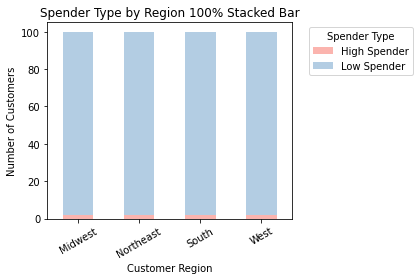

In [312]:
# Stacked 100% Bar for Spend Type
region_spend_type_100_bar = region_spend_type.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Pastel1', 4))
plt.ylabel("Number of Customers")
plt.xlabel("Customer Region")
plt.title("Spender Type by Region 100% Stacked Bar")
plt.legend(title="Spender Type",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

In [313]:
# Export customer region bar graph
region_spend_type_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_spend_type_100_bar.png'))

In [134]:
# Create crosstab of region and spender type
region_cust_type = pd.crosstab(master_df['customer_region'], master_df['customer_frequency'], dropna = False)

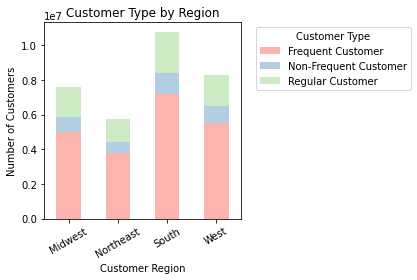

In [317]:
# Bar graph of customer type by region
region_cust_type_bar = region_cust_type.plot.bar(stacked = True, color = sns.color_palette('Pastel1'))
plt.ylabel("Number of Customers")
plt.xlabel("Customer Region")
plt.title("Customer Type by Region")
plt.legend(title="Customer Type",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

In [318]:
# Export customer region pie graph
region_cust_type_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_cust_type_bar.png'))

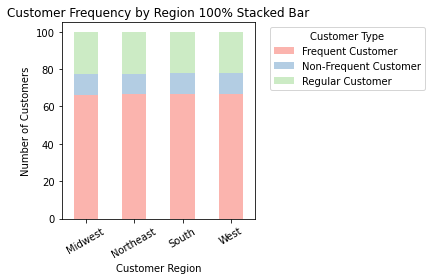

In [135]:
# Stacked 100% Bar for Region and Frequency
region_cust_type_100_bar = region_cust_type.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Pastel1', 4))
plt.ylabel("Number of Customers")
plt.xlabel("Customer Region")
plt.title("Customer Frequency by Region 100% Stacked Bar")
plt.legend(title="Customer Type",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

In [136]:
# Export customer type region pie graph
region_cust_type_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_cust_type_100_bar.png'))

In [130]:
# Create crosstab of region and customer loyalty
region_cust_loyalty = pd.crosstab(master_df['customer_region'], master_df['loyalty_flag'], dropna = False)

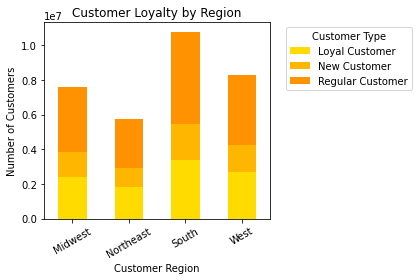

In [321]:
# Bar graph of customer type by region
region_cust_loyalty_bar = region_cust_loyalty.plot.bar(stacked = True, color = sns.color_palette('autumn_r'))
plt.ylabel("Number of Customers")
plt.xlabel("Customer Region")
plt.title("Customer Loyalty by Region")
plt.legend(title="Customer Type",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

In [323]:
# Export customer spending type
region_cust_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_cust_loyalty_bar.png'))

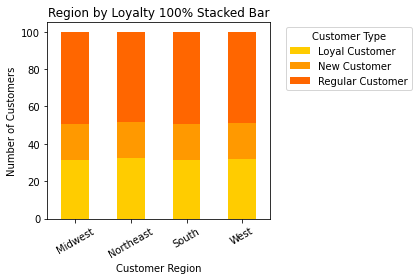

In [131]:
# Stacked 100% Bar for Spend Type
region_cust_type_100_bar = region_cust_loyalty.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('autumn_r', 4))
plt.ylabel("Number of Customers")
plt.xlabel("Customer Region")
plt.title("Region by Loyalty 100% Stacked Bar")
plt.legend(title="Customer Type",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

In [132]:
# Export customer spending type
region_cust_type_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_cust_loyalty_100_bar.png'))

In [112]:
# Create crosstab of region and customer income
region_cust_income = pd.crosstab(master_df['customer_region'], master_df['income_group'], dropna = False)

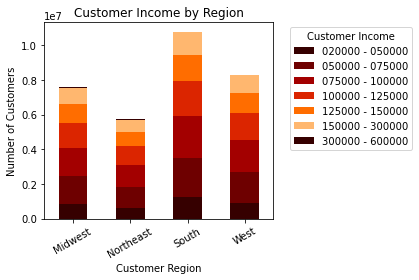

In [326]:
# Bar graph of region and customer income
region_cust_income_bar = region_cust_income.plot.bar(stacked = True, color = sns.color_palette('gist_heat'))
plt.ylabel("Number of Customers")
plt.xlabel("Customer Region")
plt.title("Customer Income by Region")
plt.legend(title="Customer Income",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

In [327]:
# Export graph of region and customer income
region_cust_income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_cust_income_bar.png'))

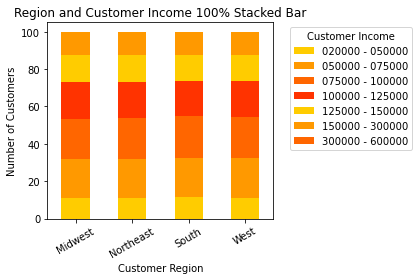

In [328]:
# Stacked 100% Bar for customer income
region_cust_income_100_bar = region_cust_income.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('autumn_r', 4))
plt.ylabel("Number of Customers")
plt.xlabel("Customer Region")
plt.title("Region and Customer Income 100% Stacked Bar")
plt.legend(title="Customer Income",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

In [329]:
# Export graph 100% stacked bar for region and customer income
region_cust_income_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_cust_income_100_bar.png'))

In [108]:
# Create crosstab of region and department
region_cust_habits = pd.crosstab(master_df['department_name'], master_df['customer_region'], dropna = False)

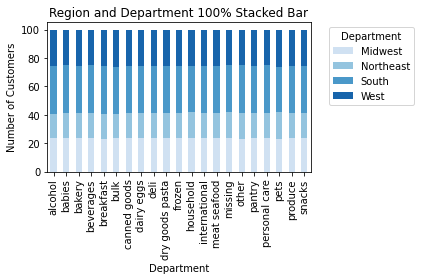

In [111]:
# Stacked 100% Bar for region and department
region_cust_habits_100_bar = region_cust_habits.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 4))
plt.ylabel("Number of Customers")
plt.xlabel("Department")
plt.title("Region and Department 100% Stacked Bar")
plt.legend(title="Department",bbox_to_anchor=(1.05,1))
plt.xticks(horizontalalignment="center")
plt.tight_layout()

In [123]:
# Export graph 100% stacked bar for region department
region_cust_habits_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_cust_habits_100_bar.png'))

In [112]:
# Create crosstab of region and time of day
region_cust_time = pd.crosstab(master_df['order_hour_of_day'], master_df['customer_region'], dropna = False)

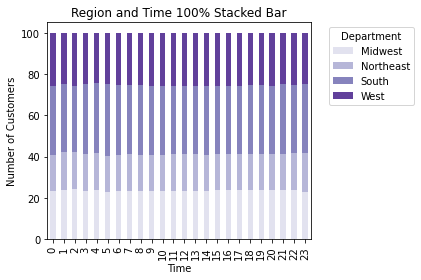

In [125]:
# Stacked 100% Bar for region and time
region_cust_time_100_bar = region_cust_time.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Purples', 4))
plt.ylabel("Number of Customers")
plt.xlabel("Time")
plt.title("Region and Time 100% Stacked Bar")
plt.legend(title="Department",bbox_to_anchor=(1.05,1))
plt.xticks(horizontalalignment="center")
plt.tight_layout()

In [126]:
# Export graph 100% stacked bar for region time
region_cust_time_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_cust_time_100_bar.png'))

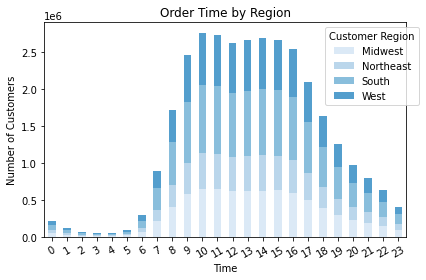

In [118]:
# Bar graph of region and customer income
region_cust_time_bar = region_cust_time.plot.bar(stacked = True, color = sns.color_palette('Blues'))
plt.ylabel("Number of Customers")
plt.xlabel("Time")
plt.title("Order Time by Region")
plt.legend(title="Customer Region",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

In [117]:
# Create crosstab of region and day of week
region_cust_day = pd.crosstab(master_df['order_day'], master_df['customer_region'], dropna = False)

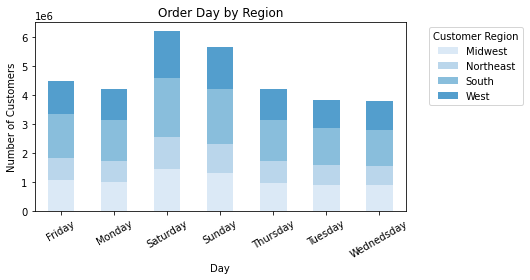

In [119]:
# Bar graph of region and day
region_cust_day_bar = region_cust_day.plot.bar(stacked = True, color = sns.color_palette('Blues'))
plt.ylabel("Number of Customers")
plt.xlabel("Day")
plt.title("Order Day by Region")
plt.legend(title="Customer Region",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

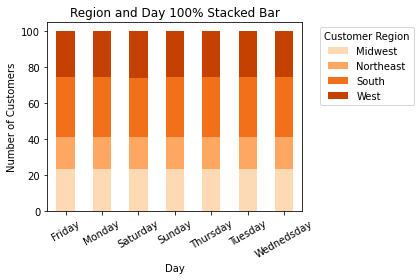

In [127]:
# Stacked 100% Bar for region and day
region_cust_day_100_bar = region_cust_day.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Oranges', 4))
plt.ylabel("Number of Customers")
plt.xlabel("Day")
plt.title("Region and Day 100% Stacked Bar")
plt.legend(title="Customer Region",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

In [128]:
# Export graph 100% stacked bar for region day
region_cust_day_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_cust_day_100_bar.png'))

The South region has the largest number of customers. There appears to be no difference in customer loyalty, income, or frequency across the regions. The midwest has a higher number of higher spending customers.

* #### 5d. Is there a connection between age and family status in terms of ordering habits?

Customer Demographics:

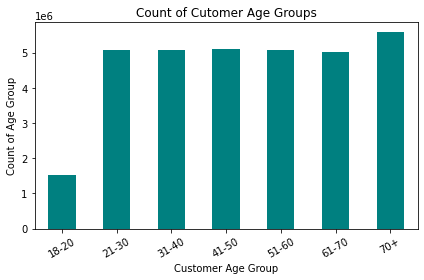

In [350]:
# Bar graph of customer age group 
cust_age_group_bar = master_df['age_group'].value_counts().sort_index().plot.bar(color = 'teal')
plt.ylabel("Count of Age Group")
plt.xlabel("Customer Age Group")
plt.title("Count of Cutomer Age Groups")
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

In [351]:
# Export customer age group count
cust_age_group_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cust_age_group.png'))

Customers over 70 years old make up the largest group of Instacart customers.

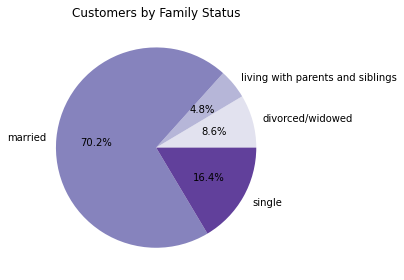

In [137]:
# Create pie chart of customers by family status
pie_cust_fam_status = master_df['customer_family_status'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('Purples', 4))
plt.title("Customers by Family Status")
plt.ylabel('')
plt.tight_layout()

In [138]:
# Export pie of customers by family status
pie_cust_fam_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_cust_fam_status.png'))

Text(0, 0.5, '')

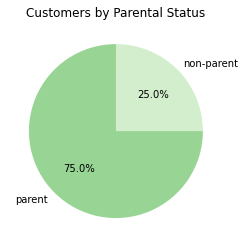

In [431]:
# Create pie chart of customers by parental statuts
pie_cust_parents = master_df['parental_status'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('Greens', 4))
plt.title("Customers by Parental Status")
plt.ylabel('')

In [432]:
# Export pie of customers by parental status
pie_cust_parents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_cust_parents.png'))

Text(0, 0.5, '')

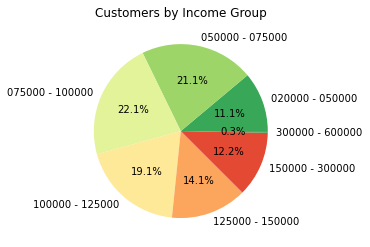

In [140]:
# Create pie chart of customers by income group
pie_cust_income = master_df['income_group'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('RdYlGn_r'))
plt.title("Customers by Income Group")
plt.ylabel('')

In [141]:
# Export pie of customers by income
pie_cust_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_cust_income.png'))

Text(0, 0.5, '')

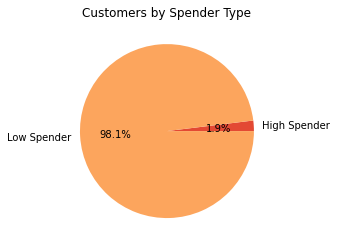

In [142]:
# Create pie chart of customers spending type
pie_cust_income = master_df['spender_type'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('RdYlGn'))
plt.title("Customers by Spender Type")
plt.ylabel('')

In [143]:
# Export pie spender type pie
pie_cust_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_cust_spend.png'))

Spending Type:

In [457]:
# Create crosstab of age group and spending type
high_income_spender = pd.crosstab(master_df['income_group'], master_df['spender_type'], dropna = False)

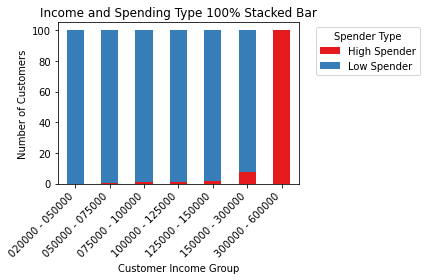

In [470]:
# Stacked 100% Bar for customer income
high_income_spender_100_bar = high_income_spender.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Set1')) 
plt.ylabel("Number of Customers")
plt.xlabel("Customer Income Group")
plt.title("Income and Spending Type 100% Stacked Bar")
plt.legend(title="Spender Type",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 45, horizontalalignment="right")
plt.tight_layout()

In [471]:
# Export graph of spending type by income
high_income_spender_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'high_income_spender_100_bar.png'))

Age Graphs:

In [197]:
# Create crosstab of age and customer frequency
age_freq = pd.crosstab(master_df['age_group'], master_df['customer_frequency'], dropna = False)

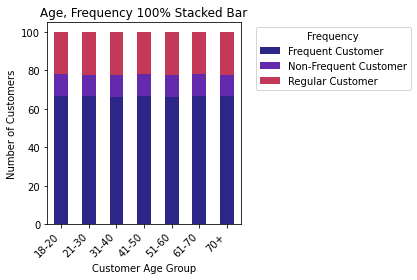

In [200]:
# Stacked 100% bar age and frequency
age_freq_100_bar = age_freq.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('CMRmap')) 
plt.ylabel("Number of Customers")
plt.xlabel("Customer Age Group")
plt.title("Age, Frequency 100% Stacked Bar")
plt.legend(title="Frequency",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 45, horizontalalignment="right")
plt.tight_layout()

In [201]:
# Export graph
age_freq_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_freq_100_bar.png'))

In [191]:
# Create crosstab of age group and loyalty
age_group_loyalty = pd.crosstab(master_df['age_group'], master_df['loyalty_flag'], dropna = False)

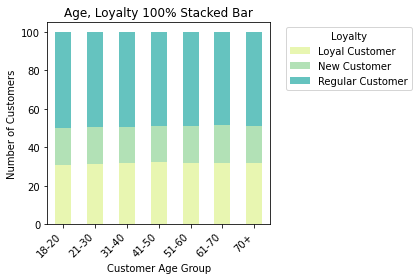

In [195]:
# Stacked 100% bar age and loyalty
age_group_loyalty_100_bar = age_group_loyalty.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('YlGnBu')) 
plt.ylabel("Number of Customers")
plt.xlabel("Customer Age Group")
plt.title("Age, Loyalty 100% Stacked Bar")
plt.legend(title="Loyalty",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 45, horizontalalignment="right")
plt.tight_layout()

In [196]:
# Export customer age group and loyalty
age_group_loyalty_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_loyalty_100_bar.png'))

In [7]:
# Create crosstab of age group and spending type
age_group_spending = pd.crosstab(master_df['age_group'], master_df['spender_type'], dropna = False)

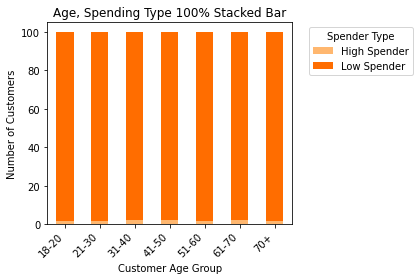

In [8]:
# Stacked 100% Bar age and spending type
age_group_spending_100_bar = age_group_spending.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('gist_heat_r')) 
plt.ylabel("Number of Customers")
plt.xlabel("Customer Age Group")
plt.title("Age, Spending Type 100% Stacked Bar")
plt.legend(title="Spender Type",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 45, horizontalalignment="right")
plt.tight_layout()

In [9]:
# Export customer age group and spending type
age_group_spending_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_spending_100_bar.png'))

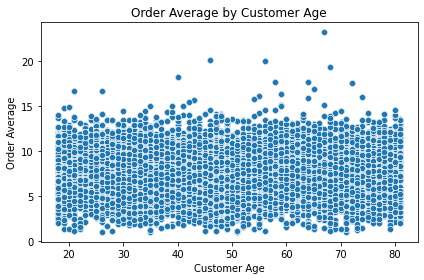

In [425]:
# Customer age and order average scatterplot
cust_age_price_scatter = sns.scatterplot(x = 'customer_age', y = 'order_avg',data = master_df)
plt.ylabel("Order Average")
plt.xlabel("Customer Age")
plt.title("Order Average by Customer Age")
plt.tight_layout()

In [426]:
# Export customer age and order average scatterplot
cust_age_price_scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cust_age_price_scatter.png'))

In [206]:
# Create crosstab of age group and order day
age_group_day = pd.crosstab(master_df['order_day'], master_df['age_group'], dropna = False)

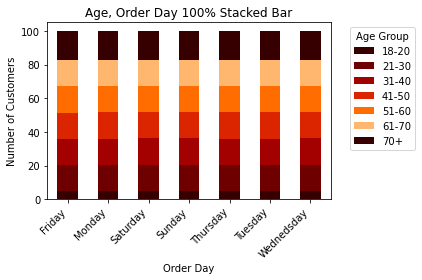

In [207]:
# Stacked 100% Bar age and day
age_group_day_100_bar = age_group_day.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('gist_heat')) 
plt.ylabel("Number of Customers")
plt.xlabel("Order Day")
plt.title("Age, Order Day 100% Stacked Bar")
plt.legend(title="Age Group",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 45, horizontalalignment="right")
plt.tight_layout()

In [208]:
# Export customer age group and day
age_group_day_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_day_100_bar.png'))

In [5]:
# Create crosstab of age group and order day
age_group_time = pd.crosstab(master_df['order_hour_of_day'], master_df['age_group'], dropna = False)

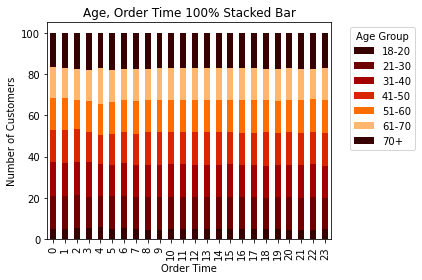

In [6]:
# Stacked 100% Bar age and day
age_group_time_100_bar = age_group_time.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('gist_heat')) 
plt.ylabel("Number of Customers")
plt.xlabel("Order Time")
plt.title("Age, Order Time 100% Stacked Bar")
plt.legend(title="Age Group",bbox_to_anchor=(1.05,1))
plt.tight_layout()

In [222]:
# Export customer age group and time
age_group_time_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_time_100_bar.png'))

Family Status Graphs:

In [145]:
# Create crosstab of family status and customer frequency
fam_status_freq = pd.crosstab(master_df['customer_family_status'], master_df['customer_frequency'], dropna = False)

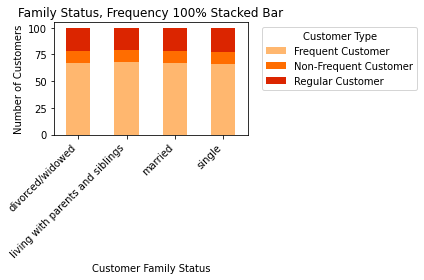

In [150]:
# Stacked 100% Bar family status, cust type
fam_status_freq_100_bar = fam_status_freq.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('gist_heat_r')) 
plt.ylabel("Number of Customers")
plt.xlabel("Customer Family Status")
plt.title("Family Status, Frequency 100% Stacked Bar")
plt.legend(title="Customer Type",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 45, horizontalalignment="right")
plt.tight_layout()

In [151]:
# Export graph
fam_status_freq_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_status_freq_100_bar.png'))

In [159]:
# Create crosstab of age group and spending type
fam_status_spender = pd.crosstab(master_df['customer_family_status'], master_df['spender_type'], dropna = False)

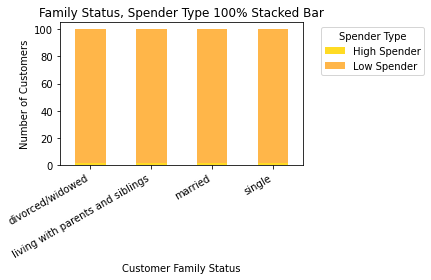

In [161]:
# Stacked 100% Bar for family status and spender type
fam_status_spender_100_bar = fam_status_spender.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('spring_r'))
plt.ylabel("Number of Customers")
plt.xlabel("Customer Family Status")
plt.title("Family Status, Spender Type 100% Stacked Bar")
plt.legend(title="Spender Type",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 30, horizontalalignment="right")
plt.tight_layout()

In [162]:
# Export graph
fam_status_spender_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_status_spender_100_bar.png'))

In [169]:
# Create crosstab of family status and loyalty
fam_status_loyalty = pd.crosstab(master_df['customer_family_status'], master_df['loyalty_flag'], dropna = False)

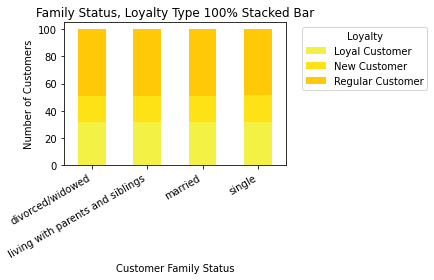

In [170]:
# Stacked 100% Bar for family status and spender type
fam_status_loyalty_100_bar = fam_status_loyalty.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Wistia'))
plt.ylabel("Number of Customers")
plt.xlabel("Customer Family Status")
plt.title("Family Status, Loyalty Type 100% Stacked Bar")
plt.legend(title="Loyalty",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 30, horizontalalignment="right")
plt.tight_layout()

In [171]:
# Export graph
fam_status_loyalty_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_status_loyalty_100_bar.png'))

In [8]:
# Create crosstab of family status and order day
fam_status_day = pd.crosstab(master_df['order_day'], master_df['customer_family_status'], dropna = False)

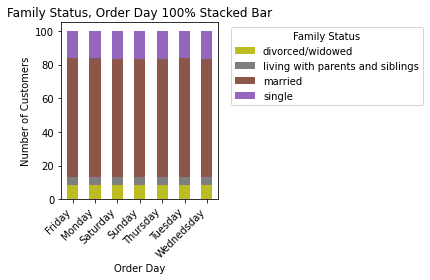

In [12]:
# Stacked 100% Bar for family status and order day
fam_status_day_100_bar = fam_status_day.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('tab10_r'))
plt.ylabel("Number of Customers")
plt.xlabel("Order Day")
plt.title("Family Status, Order Day 100% Stacked Bar")
plt.legend(title="Family Status",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 45, horizontalalignment="right")
plt.tight_layout()

In [13]:
# Export graph
fam_status_day_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_status_day_100_bar.png'))

In [180]:
# Create crosstab of family status and order time
fam_status_time = pd.crosstab(master_df['order_hour_of_day'], master_df['customer_family_status'], dropna = False)

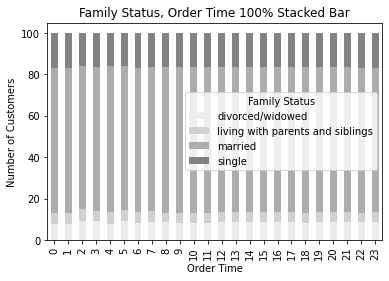

In [219]:
# Stacked 100% Bar for family status and order time
fam_status_time_100_bar = fam_status_time.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Greys'))
plt.ylabel("Number of Customers")
plt.xlabel("Order Time")
plt.title("Family Status, Order Time 100% Stacked Bar")
plt.legend(title="Family Status")

In [220]:
# Export graph
fam_status_time_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_status_time_bar.png'))

Parental Status Graphs:

In [15]:
# Create crosstab of parental status and spending type
parent_spending = pd.crosstab(master_df['parental_status'], master_df['spender_type'], dropna = False)

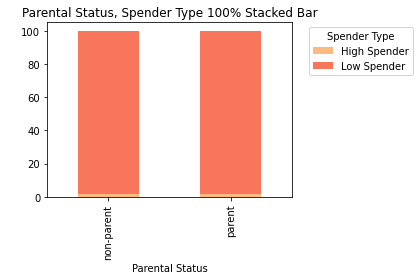

In [16]:
# Stacked 100% bar - parent status and spender type
parent_spending_100_bar = parent_spending.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('magma_r')) 
plt.ylabel(" ")
plt.xlabel("Parental Status")
plt.title("Parental Status, Spender Type 100% Stacked Bar")
plt.legend(title="Spender Type",bbox_to_anchor=(1.05,1))
plt.tight_layout()

In [17]:
# Export graph
parent_spending_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'parent_spending_100_bar.png'))

In [37]:
# Create crosstab of parental status and loyatlty
parent_loyalty = pd.crosstab(master_df['parental_status'], master_df['loyalty_flag'], dropna = False)

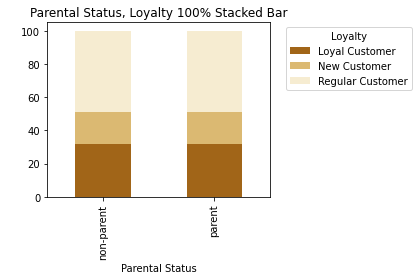

In [38]:
# Stacked 100% Bar for customer income
parent_loyalty_100_bar = parent_loyalty.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG'))
plt.ylabel(" ")
plt.xlabel("Parental Status")
plt.title("Parental Status, Loyalty 100% Stacked Bar")
plt.legend(title="Loyalty",bbox_to_anchor=(1.05,1))
plt.tight_layout()

In [39]:
# Export graph
parent_loyalty_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'parent_loyalty_100_bar.png'))

In [31]:
# Create crosstab of parent and frequency
parent_status_freq = pd.crosstab(master_df['parental_status'], master_df['customer_frequency'], dropna = False)

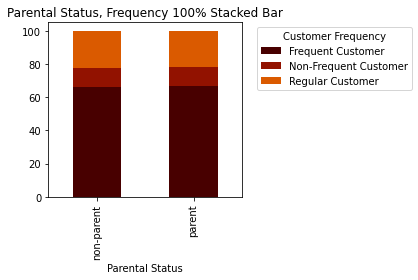

In [34]:
# Stacked 100% Bar for customer income
parent_status_freq_100_bar = parent_status_freq.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('afmhot'))
plt.ylabel(" ")
plt.xlabel("Parental Status")
plt.title("Parental Status, Frequency 100% Stacked Bar")
plt.legend(title="Customer Frequency",bbox_to_anchor=(1.05,1))
plt.tight_layout()

In [35]:
# Export graph
parent_status_freq_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'parent_status_freq_100_bar.png'))

In [19]:
# Create crosstab of parent and order day
parent_status_day = pd.crosstab(master_df['order_day'], master_df['parental_status'], dropna = False)

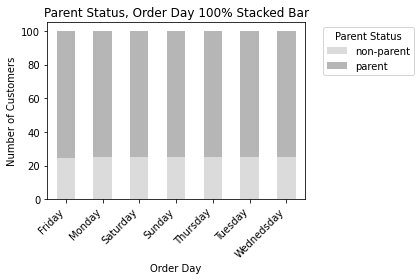

In [27]:
# Stacked 100% Bar for parent and order day
parent_status_day_100_bar = parent_status_day.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('gist_yarg'))
plt.ylabel("Number of Customers")
plt.xlabel("Order Day")
plt.title("Parent Status, Order Day 100% Stacked Bar")
plt.legend(title="Parent Status",bbox_to_anchor=(1.05,1))
plt.xticks(rotation= 45, horizontalalignment="right")
plt.tight_layout()

In [28]:
# Export graph
parent_status_day_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'parent_status_day_100_bar.png'))

In [22]:
# Create crosstab of parent and order time
parent_status_time = pd.crosstab(master_df['order_hour_of_day'], master_df['parental_status'], dropna = False)

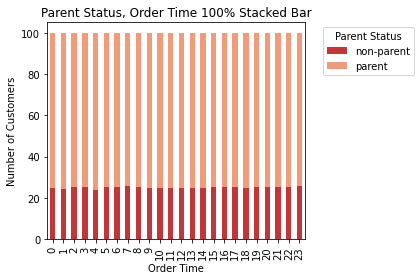

In [23]:
# Stacked 100% Bar for parent and order time
parent_status_time_100_bar = parent_status_time.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('RdBu'))
plt.ylabel("Number of Customers")
plt.xlabel("Order Time")
plt.title("Parent Status, Order Time 100% Stacked Bar")
plt.legend(title="Parent Status",bbox_to_anchor=(1.05,1))
plt.tight_layout()

In [283]:
# Export graph
parent_status_time_100_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'parent_status_time_100_bar.png'))

### Key Question 6: Are there other considerations regarding customer behaviors or demographics?

In [248]:
#Create pet owner profile
pet_owner = master_df[master_df['department_name']=='pets']

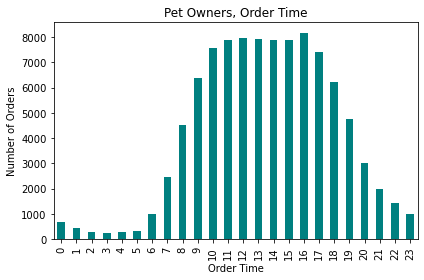

In [253]:
# Pet owner order time 
pet_owner_time_bar = pet_owner['order_hour_of_day'].value_counts().sort_index().plot.bar(color = 'teal')
plt.ylabel("Number of Orders")
plt.xlabel("Order Time")
plt.title("Pet Owners, Order Time")
plt.tight_layout()

In [278]:
# Export graph
pet_owner_time_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_owner_time_bar.png'))

Text(0, 0.5, '')

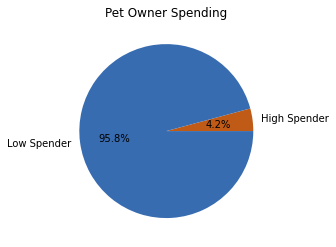

In [280]:
# Create pie chart of customer loyalty groups
pet_owner_spend_pie = pet_owner['spender_type'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('Accent_r', 4))
plt.title("Pet Owner Spending")
plt.ylabel('')

In [281]:
# Export graph
pet_owner_spend_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_owner_spend_pie.png'))

In [257]:
#Create young families profile - customers who are marrried, parents, and shop in the baby department
new_parent_sub = master_df[(master_df['customer_family_status']=="married") & (master_df['parental_status']=="parent") & (master_df['department_name']=='babies')]

Text(0, 0.5, '')

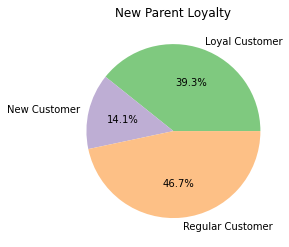

In [264]:
# Create pie chart of customer loyalty groups
new_parent_loyal_pie = new_parent_sub['loyalty_flag'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('Accent', 4))
plt.title("New Parent Loyalty")
plt.ylabel('')

In [279]:
# Export graph
new_parent_loyal_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'new_parent_loyal_pie.png'))

In [482]:
master_df.shape

(32399727, 41)